In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
os.getcwd()

'C:\\Users\\Dhananjay\\3D Objects\\imarticus PGDA\\Machine learning\\Supervised Learning\\KNN\\Market Positioning of Mobile'

In [4]:
data =pd.read_csv('Mobile_data.csv')
df =data.copy(deep=True)
df

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0


In [5]:
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

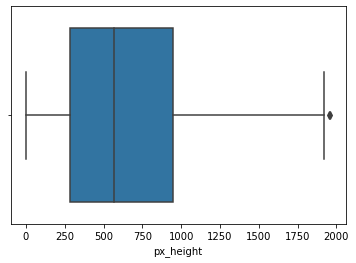

In [7]:
sns.boxplot(x=df.px_height,data=df)
plt.show()

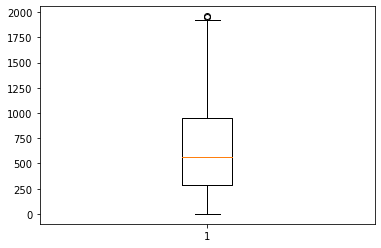

In [8]:
plt.boxplot(df.px_height)
plt.show()

In [9]:
df.px_height[df.px_height==0]

1481    0
1933    0
Name: px_height, dtype: int64

In [10]:
df.px_height[df.px_height==0]=df.px_height.mean

C:\Users\DHANAN~1\AppData\Local\Temp/ipykernel_11776/1931297500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.px_height[df.px_height==0]=df.px_height.mean


In [11]:
# or you can replace like this
df.px_height[df.px_height==0]=np.nan
df.px_height.fillna(df.px_height.mean,inplace=True)

C:\Users\DHANAN~1\AppData\Local\Temp/ipykernel_11776/1228802390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.px_height[df.px_height==0]=np.nan


In [12]:
df.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

So many inconssistences in data of px_height,px_width,sc_w,sc_h so we drop it

In [13]:
df_subset=df.drop(['px_height','px_width','sc_w','sc_h'],axis =1)

In [14]:
df_subset

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,2549,19,1
1,1021,0.5,0,53,0.7,136,3,6,2631,7,2
2,563,0.5,2,41,0.9,145,5,6,2603,9,2
3,615,2.5,0,10,0.8,131,6,9,2769,11,2
4,1821,1.2,13,44,0.6,141,2,14,1411,15,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,668,19,0
1996,1965,2.6,0,39,0.2,187,4,3,2032,16,2
1997,1911,0.9,1,36,0.7,108,8,3,3057,5,3
1998,1512,0.9,4,46,0.1,145,5,5,869,19,0


In [15]:
# build model
x=df_subset.iloc[:,1:-1]
y=df_subset.iloc[:,-1]
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report as report
from sklearn.metrics import confusion_matrix as matrix
from sklearn.metrics import accuracy_score

In [17]:
# splitting
sc=StandardScaler() 

In [18]:
knn=KNeighborsClassifier(n_neighbors=5,weights='distance')

In [19]:
# splitting the data
x_train,x_test,y_train,y_test=split(x,y,test_size=0.25,random_state=1)

In [20]:
#SCaled DATA    
x_train_sc=sc.fit_transform(x_train)
# dataframe
X_train_sc=pd.DataFrame(x_train_sc)


x_test_sc=sc.transform(x_test)
#dataframe
X_test_sc=pd.DataFrame(x_test_sc)

# KNN BASE Model SCALED data

In [52]:


for k in range(1,16,2):
    knn=KNeighborsClassifier(n_neighbors=k,weights='uniform')
    
    knn.fit(x_train_sc,y_train)
    
    train_pred=knn.predict(x_train_sc)
    test_pred=knn.predict(x_test_sc)
    
    tr_acc=accuracy_score(y_train,train_pred)
    
    ts_acc=accuracy_score(y_test,test_pred)
    
    accuracy=({'k':k,'acc':[tr_acc,ts_acc]})
    print(accuracy)
    
    print('\n tr_report',report(y_train,train_pred))
    print('\n ts_report\n',report(y_test,test_pred))    
    print('\n tr_matrix\n',matrix(y_train,train_pred))
    print('\nts_matrix\n\n ',matrix(y_test,test_pred))
 


{'k': 1, 'acc': [1.0, 0.54]}

 tr_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       384
           1       1.00      1.00      1.00       374
           2       1.00      1.00      1.00       365
           3       1.00      1.00      1.00       377

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500


 ts_report
               precision    recall  f1-score   support

           0       0.66      0.62      0.64       116
           1       0.40      0.42      0.41       126
           2       0.45      0.48      0.46       135
           3       0.70      0.65      0.67       123

    accuracy                           0.54       500
   macro avg       0.55      0.54      0.55       500
weighted avg       0.55      0.54      0.54       500


 tr_matrix
 [[384   0   0   0]
 [  0 374   0   0]
 [  0   0 365   0]
 [  0 

# KNN  BASE MODEL with UNSCALED data

In [48]:
# model fitting without scaling with different k values

for k in range(1,16,2):
    knn=KNeighborsClassifier(n_neighbors=k,weights='uniform')
    
    knn.fit(x_train,y_train)
    
    train_pred=knn.predict(x_train)
    test_pred=knn.predict(x_test)
    
    tr_acc=accuracy_score(y_train,train_pred)
    
    ts_acc=accuracy_score(y_test,test_pred)
    
    accuracy=({'k':[tr_acc,ts_acc]})
    print(accuracy)
    
    print('\n tr_report',report(y_train,train_pred))
    print('\n ts_report\n',report(y_test,test_pred))    
    print('\n tr_matrix\n',matrix(y_train,train_pred))
    print('\nts_matrix\n\n ',matrix(y_test,test_pred))
 
    



{'k': [1.0, 0.642]}

 tr_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       384
           1       1.00      1.00      1.00       374
           2       1.00      1.00      1.00       365
           3       1.00      1.00      1.00       377

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500


 ts_report
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       116
           1       0.54      0.48      0.51       126
           2       0.52      0.56      0.54       135
           3       0.74      0.72      0.73       123

    accuracy                           0.64       500
   macro avg       0.65      0.65      0.65       500
weighted avg       0.64      0.64      0.64       500


 tr_matrix
 [[384   0   0   0]
 [  0 374   0   0]
 [  0   0 365   0]
 [  0   0   0 3

# KNN model with RFE

In [32]:
from sklearn.feature_selection import RFE

In [42]:
# RFE setting
rfe =RFE(estimator =knn,n_features_to_select =10,step=3,verbose =1)
rfe.fit(x_train,y_train)

train_pred=rfe.predict(x_train)
test_pred=knn.predict(x_test)

print('\n tr_report',report(y_train,train_pred))
print('\n ts_report\n',report(y_test,test_pred))    
print('\n tr_matrix\n',matrix(y_train,train_pred))
print('\nts_matrix\n\n ',matrix(y_test,test_pred))


 tr_report               precision    recall  f1-score   support

           0       0.84      0.90      0.87       384
           1       0.71      0.68      0.69       374
           2       0.69      0.65      0.67       365
           3       0.85      0.87      0.86       377

    accuracy                           0.77      1500
   macro avg       0.77      0.77      0.77      1500
weighted avg       0.77      0.77      0.77      1500


 ts_report
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       116
           1       0.60      0.58      0.59       126
           2       0.62      0.63      0.63       135
           3       0.80      0.80      0.80       123

    accuracy                           0.70       500
   macro avg       0.70      0.70      0.70       500
weighted avg       0.70      0.70      0.70       500


 tr_matrix
 [[344  40   0   0]
 [ 63 253  58   0]
 [  3  65 237  60]
 [  0   0  49 328]]

ts_matrix

  [